# Reducción e inerpolación de imágenes

Implementar un algoritmo  que reciba como parámetro una imagen y un tamaño de bloque $n$. El programa creará una imagen reducida de tamaño $\frac{filas}{n}$ y $\frac{columnas}{n}$. Para ello, en primer lugar debemos hacer que la imagen tenga un número de filas y columnas que sea múltiplo de $n$. Esto lo podemos hacer de dos maneras:
-	Quitar el mínimo número de filas y columnas (quitándolas siempre por el final, es decir, quitar las últimas filas/columnas.
-	Añadir el mínimo número de filas y columnas (añadiéndolas siempre desde por el final).

Una vez transformada la imagen, la dividimos en bloques disjuntos de tamaño $n\times n$. Cada uno de los $n\times n$ píxeles de cada bloque se agregarán utilizando alguna de las funciones vistas en clase: mínimo, media, mediana, media geométrica, máximo, media ponderada con coeficientes gaussianos, ... Los píxeles que vayamos obteniendo se irán colocando en la imagen reducida. 

Una vez que la imagen está reducida, vamos a aproximar una imagen del mismo tamaño que la imagen original Para ello, lee la información de la función `cv2.resize` y comprueba las diferencias entre la imagen aproximada y la imagen original. ¿Qué combinación de reducción-interpolación es la que menor error obtiene? 


(346, 615, 3)
(173, 307, 3)
(346, 615, 3)


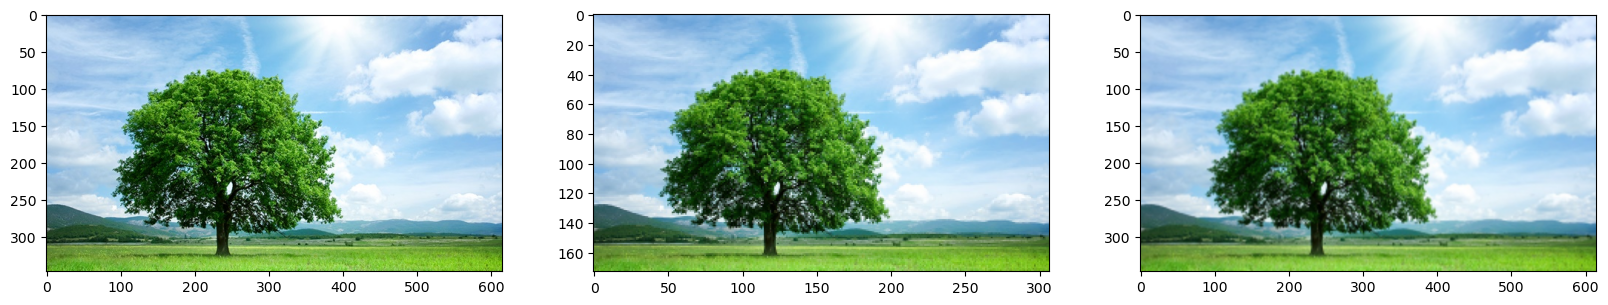

In [6]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def reducir_imagen(imagen, n):
    F, C = (image.shape[0]//n)*n,(image.shape[1]//n)*n
    image_aux = imagen[0:F,0:C].astype(np.float32)
    F_final, C_final = F//n, C//n

    if len(imagen.shape)==3:
        reshaped = image_aux.reshape(F_final,n,C_final,n,imagen.shape[2])
        bloques = reshaped.transpose(0,2,1,3,4)
    else:
        reshaped = image_aux.reshape(F_final,n,C_final,n)
        bloques = reshaped.transpose(0,2,1,3)
    
    image_reducida = bloques.mean(axis=(2,3))
    return image_reducida.astype(np.uint8)

image = cv2.imread('arbol.jpg',1)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
n=2
reducida = reducir_imagen(image, n)
print(reducida.shape)

reampliada = cv2.resize(reducida,(image.shape[1],image.shape[0]))
print(reampliada.shape)
fig, axes = plt.subplots(1,3,figsize=(20,10))
axes[0].imshow(image)
axes[1].imshow(reducida)
axes[2].imshow(reampliada)
    
